In [1]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_auc_score,roc_curve,plot_roc_curve

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import make_column_transformer

from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,PowerTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [26]:
data=pd.read_csv('Ratings_Reviews.csv')
data.head()

,Unnamed: 0,Reviews,Ratings
0,0,Do not buy iphone or expensive product from Am...,1
1,1,Don’t buy it from this seller,1
2,2,First Time iPhone User Review :-),5
3,3,Worst Experience Ever.!,1
4,4,iPhone 11,1


In [27]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [28]:
print('Data shape is ',data.shape)

print('Data info',data.info())

Data shape is  (38438, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38438 entries, 0 to 38437
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  38436 non-null  object
 1   Ratings  38438 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 600.7+ KB
Data info None


In [29]:
print('Data Set description',data.describe())

Data Set description             Ratings
count  38438.000000
mean       3.506686
std        1.592234
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        5.000000


Reviews    2
Ratings    0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


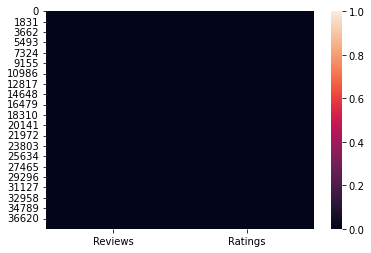

In [30]:
# checking null values
print(data.isnull().sum())
print(sns.heatmap(data.isnull()))

In [31]:
data.dropna(inplace=True)

In [32]:
data.shape

(38436, 2)

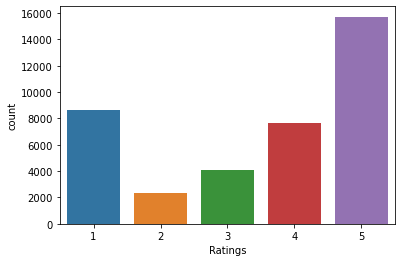

In [33]:
sns.countplot(data['Ratings'])
plt.show()

In [34]:
data['length'] = data['Reviews'].str.len()
data.head(2)

,Reviews,Ratings,length
0,Do not buy iphone or expensive product from Am...,1,50
1,Don’t buy it from this seller,1,29


In [36]:
data['Reviews'] = data['Reviews'].str.lower()

data['Reviews'] = data['Reviews'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english')+['product'+'amazon'+'mobile'+'phone'+'headphones'+'laptops'+'cameras'])
data['Reviews'] = data['Reviews'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
data['Reviews'] = data['Reviews'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [37]:
data['clean_length'] = data.Reviews.str.len()
data.head()

,Reviews,Ratings,length,clean_length
0,buy iphone expensive product amazom,1,50,35
1,don’t buy seller,1,29,16
2,first time iphone user review :-),5,33,33
3,worst experience ever.!,1,23,23
4,iphone 11,1,9,9


In [38]:
print ('Original Length', data.length.sum())
print ('Clean Length', data.clean_length.sum())

Original Length 943076
Clean Length 746059


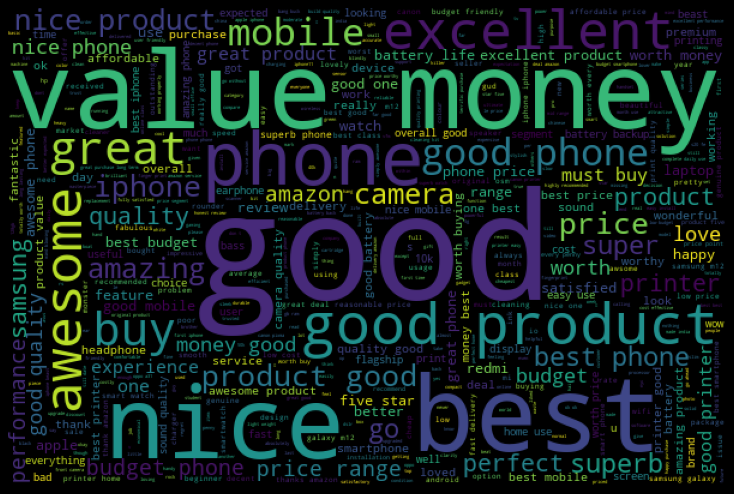

In [39]:
from wordcloud import WordCloud
hams = data['Reviews'][data['Ratings']>4]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=500).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

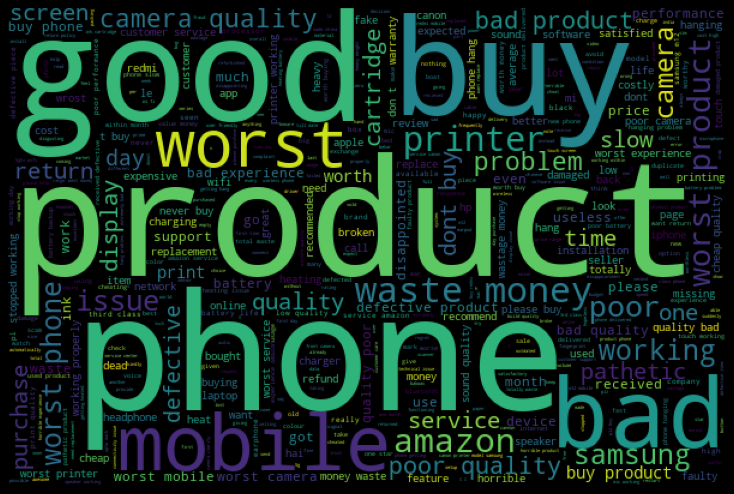

In [40]:
from wordcloud import WordCloud
hams = data['Reviews'][data['Ratings']<2]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=500).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [51]:
data.head()

,Reviews,Ratings,length,clean_length
0,buy iphone expensive product amazom,1,50,35
1,don’t buy seller,1,29,16
2,first time iphone user review :-),5,33,33
3,worst experience ever.!,1,23,23
4,iphone 11,1,9,9


In [45]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(data['Reviews'])

In [59]:
from collections import Counter
strategy = { 1:16000, 2:16000, 3:16000, 4:15000, 5:16000}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(features, data['Ratings'])

<AxesSubplot:xlabel='Ratings', ylabel='count'>

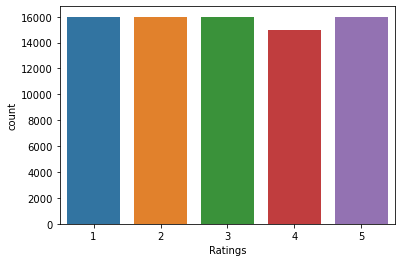

In [60]:
sns.countplot(y)

In [64]:
Linear=LogisticRegression()
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()
DT=DecisionTreeClassifier()

algo=[Linear,RandomForest,DT,knn]
maximum_acc=[]

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.33,random_state=110)

for model in algo:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    accuracy=round(accuracy_score(Y_test,Y_pred),4)*100
    confusionMatrix=confusion_matrix(Y_test,Y_pred)
    classificationReport=classification_report(Y_test,Y_pred)
    maximum_acc.append(accuracy)
    print(f"{model}:\n---------------------------\n---------------------------\n")
    print(f"The accuracy is {accuracy} of model {model} at random state 110")
    print("\n\nConfusion Matrix:\n\n",confusionMatrix)
    print(f"\n\n\n Classification report for the model:\n",classificationReport)
    

LogisticRegression():
---------------------------
---------------------------

The accuracy is 53.31 of model LogisticRegression() at random state 110


Confusion Matrix:

 [[3492  919  477  210  176]
 [ 960 3007  768  383  174]
 [ 617  914 2607  749  410]
 [ 267  583  742 1942 1325]
 [ 291  488  402 1316 2851]]



 Classification report for the model:
               precision    recall  f1-score   support

           1       0.62      0.66      0.64      5274
           2       0.51      0.57      0.54      5292
           3       0.52      0.49      0.51      5297
           4       0.42      0.40      0.41      4859
           5       0.58      0.53      0.55      5348

    accuracy                           0.53     26070
   macro avg       0.53      0.53      0.53     26070
weighted avg       0.53      0.53      0.53     26070

RandomForestClassifier():
---------------------------
---------------------------

The accuracy is 69.85 of model RandomForestClassifier() at random state 

#### Plotting ROC Curve

AUC ROC Score of Logistic Regressor model : 0.8233251495456033


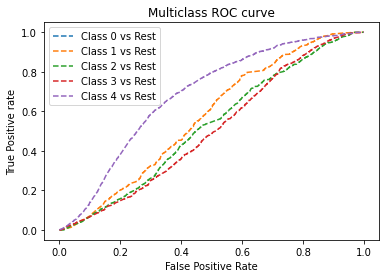

In [72]:
Y_pred_prob_rf=Linear.predict_proba(X_test)

print("AUC ROC Score of Logistic Regressor model :",roc_auc_score(Y_test, Y_pred_prob_rf, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_rf[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

AUC ROC Score of RandomForest : 0.9167320329307972


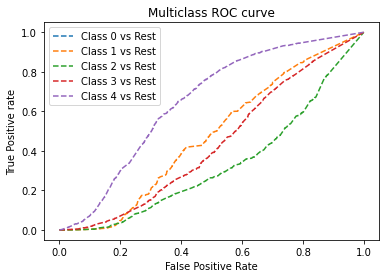

In [73]:
Y_pred_prob_rf=RandomForest.predict_proba(X_test)

print("AUC ROC Score of RandomForest :",roc_auc_score(Y_test, Y_pred_prob_rf, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_rf[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

AUC ROC Score of DecisionTree : 0.836453179929035


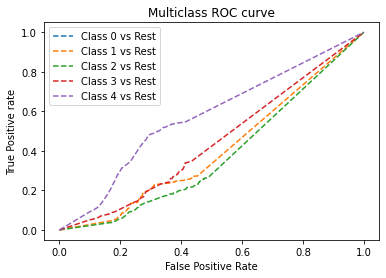

In [74]:
Y_pred_prob_rf=DT.predict_proba(X_test)

print("AUC ROC Score of DecisionTree :",roc_auc_score(Y_test, Y_pred_prob_rf, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_rf[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

AUC ROC Score of KNN : 0.8355165950670368


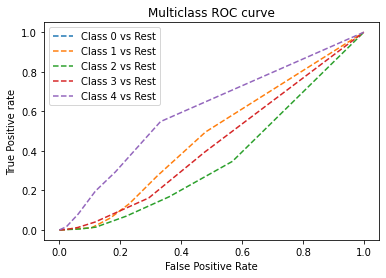

In [75]:
Y_pred_prob_rf=knn.predict_proba(X_test)

print("AUC ROC Score of KNN :",roc_auc_score(Y_test, Y_pred_prob_rf, multi_class='ovo', average='weighted'))

fpr = {}
tpr = {}
thresh ={}

n_class = len(Y_test.unique().tolist())

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(Y_test, Y_pred_prob_rf[:,i], pos_label=i)
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f"Class {i} vs Rest")
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  

here for model Random Forest we get the highest AUC score. So, we finalized RandomForest model.

#### Hyper parameter Tuning

In [66]:
reg=RandomForestClassifier()
param={
    "n_estimators":[550,250],
    "min_samples_split":[4],
    "min_samples_leaf":[2],
    "max_depth":[27]
    
}
grd=GridSearchCV(reg,param_grid=param,cv=5)
grd.fit(X_train,Y_train)
print("Best Pramaeters:",grd.best_params_)

reg=grd.best_estimator_   #reinstantiating the best parameter to algo

reg.fit(X_train,Y_train)
ypred=reg.predict(X_test)

print(f"The accuracy is {round(accuracy_score(ypred,Y_test)*100,2)}% of model Random Forest.")


print("\nClassification Report:",classification_report(ypred,Y_test))

print(f"\n Confusion Matrix for the model:",confusion_matrix(ypred,Y_test))


Best Pramaeters: {'max_depth': 27, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 250}
The accuracy is 48.97% of model Random Forest.

Classification Report:               precision    recall  f1-score   support

           1       0.65      0.56      0.60      6061
           2       0.59      0.41      0.48      7634
           3       0.38      0.54      0.45      3785
           4       0.33      0.39      0.36      4084
           5       0.49      0.58      0.53      4506

    accuracy                           0.49     26070
   macro avg       0.49      0.50      0.48     26070
weighted avg       0.51      0.49      0.49     26070


 Confusion Matrix for the model: [[3417 1095  763  385  401]
 [1275 3117 1399  953  890]
 [ 290  514 2028  675  278]
 [ 165  414  726 1602 1177]
 [ 127  152  381 1244 2602]]


As we have decrease in accuracy after hyper tuned. So, it's better to use Random Forest with default parameters.

In [76]:
# Saving model

import pickle
pickle.dump(RandomForest,open("Rating_Classifier.pickle","wb"))